final_27938.pth

FEAR 1002

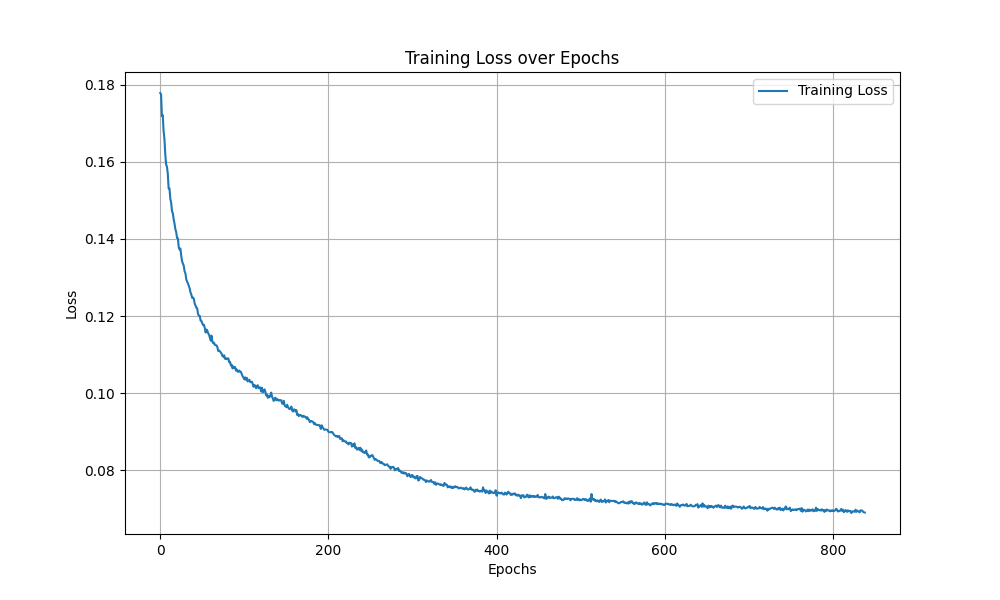

In [7]:

import os
import sys
import numpy as np
# import widgets
sys.path.append('pytorch-dc-tts/')
sys.path.append('pytorch-dc-tts/models')
sys.path.append("tacotron_pytorch/")
sys.path.append("tacotron_pytorch/lib/tacotron")


# For the Tacotron
from text import text_to_sequence, symbols
# from util import audio

from tacotron_pytorch import Tacotron
from synthesis import tts as _tts

# For Audio/Display purposes
import librosa.display
import IPython
from IPython.display import Audio
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

model = Tacotron(n_vocab=len(symbols),
                 embedding_dim=256,
                 mel_dim=80,
                 linear_dim=1025,
                 r=5,
                 padding_idx=None,
                 use_memory_mask=False,
                 )


def tts_tacotron(model, text):
    waveform, alignment, spectrogram = _tts(model, text)
    return waveform, alignment, spectrogram 

def present(waveform, Emotion, figures=False):
  # if figures!=False:
  #       visualize(figures[0], figures[1], Emotion)
  IPython.display.display(Audio(waveform, rate=fs))

  
fs = 20000 #20000
hop_length = 250
model.decoder.max_decoder_steps = 200

In [ ]:
#@title Select the emotion and type the text
import torch
%pylab inline

Emotion = "Disgust" #@param ["Neutral", "Angry", "Disgust", "Sleepiness", "Amused"]
Text = 'I am exhausted.' #@param {type:"string"}

wav, align, mel = None, None, None

if Emotion == "Disgust" or Emotion == "Amused" or Emotion == "Sleepiness":
  checkpoint = torch.load('fear_1002_1000epochs_2e-5.pth', map_location=torch.device('cpu'))
  model.load_state_dict(checkpoint["state_dict"])
  wav, align, mel = tts_tacotron(model, Text)

present(wav, Emotion, (align,mel))



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


TypeError: present() got multiple values for argument 'figures'

In [5]:
!pip install widgets

ERROR: Could not find a version that satisfies the requirement widgets (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\kliu3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for widgets
